<a href="https://colab.research.google.com/github/Baldros/Supervisioned-Learning/blob/main/DecisionTree_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    O objetivo desse código é estudar Árvores de Decisão
    para Regressão, ou seja, para predições para valores reais.

# Preparando os dados:
Vamos escolher um dataset adequado para o estudo.

In [ ]:
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
for dataset in dir(datasets):
  if "load" in dataset:
    print(dataset)

__loader__
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


In [ ]:
for dataset_name in dir(datasets):
    if "load" in dataset_name:
        load_function = getattr(datasets, dataset_name)
        if callable(load_function) and not dataset_name.startswith('_'):
            try:
                data = load_function()
                if hasattr(data, 'target') and isinstance(data.target[0], (int, float)):
                    print(f"Dataset {dataset_name} possui target com valores reais.")
            except (AttributeError, TypeError):
                pass

Dataset load_diabetes possui target com valores reais.


**Built-in Functions (funções incorporadas)**

    O python possui várias funções incorporadas na própria
    linguagem das quais usamos o tempo todo, como len(), sum()
    etc. Mas as Built-in Functions utilizadas aqui valem uma
    explicação mais elaborada.

getattr()

    A função getattr(objeto, nome_do_atributo, defaut) é utilizada
    para obter o valor de um atributo de um objeto, dado o nome do
    atributo como uma string. Foi utilizada no código para obter a
    função de carregamento do dataset correspondente.

callable()

    A função callable(objeto) verifica se o objeto pode ser
    chamado como uma função. No código, foi utilizada para
    garantir que a função de carregamento obtida é de fato
    uma função antes de tentar chamá-la.

startswith()

    O método startswith() é um método de string que verifica
    se a string começa com um determinado prefixo. No código,
    not dataset_name.startswith('_') é utilizado para garantir
    que não seja utilizado uma string indevida no processo.

hasattr()

    A função hasattr(objeto, nome_do_atributo) verifica se um
    objeto possui um determinado atributo. No código, foi utilizada
    para verificar se o dataset carregado possui o atributo 'target'.


isinstance()

    A função isinstance(objeto, tipo) verifica se o objeto é uma
    instância do tipo especificado. Foi utilizada para verificar
    se o elemento do atributo 'target' é do tipo int ou float.



In [ ]:
# Definindo o dataset:

data = datasets.load_diabetes();data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
X = data.data
y = data.target

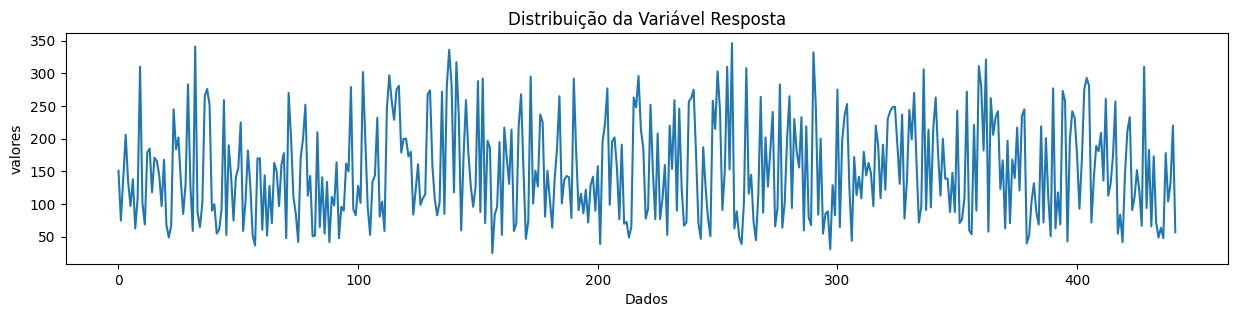

In [ ]:
# Visualização da variável reposta:
plt.figure(figsize=(15,3))
plt.plot(y)
plt.title('Distribuição da Variável Resposta')
plt.xlabel('Dados')
plt.ylabel('valores')
plt.show()

# Checando linearidade dos dados:

    Antes de partirmos para a regressão propriamente
    dita, vamos analisar o comportamento dos dados.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Construindo o dataframe:

df = pd.concat([pd.DataFrame(X, columns=data.feature_names),
                pd.DataFrame(y,columns=['target'])],axis=1);df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:
resultado = '+'.join(df.columns);resultado

'age+sex+bmi+bp+s1+s2+s3+s4+s5+s6+target'

In [ ]:
lm = smf.ols('target~'+resultado, data = df).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.510e+31
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:32:16   Log-Likelihood:                 12509.
No. Observations:                 442   AIC:                        -2.499e+04
Df Residuals:                     430   BIC:                        -2.494e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.121e-14    1.8e-14      4.507      0.0

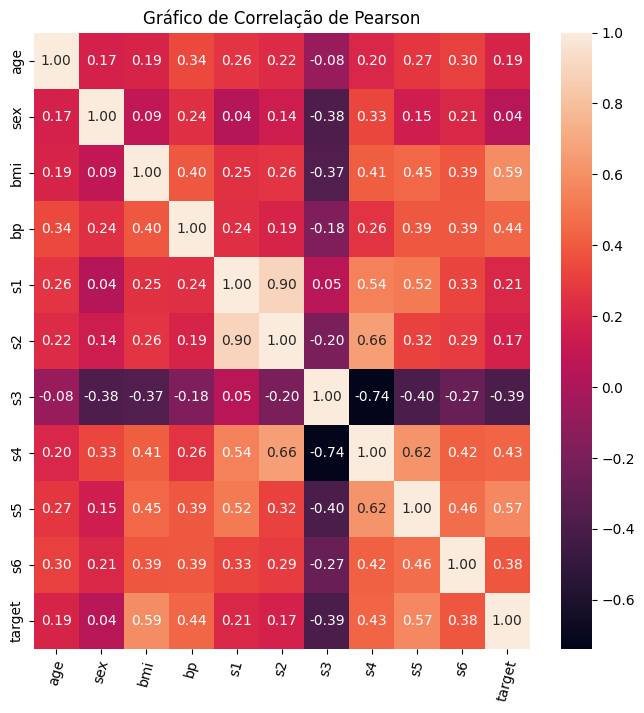

In [ ]:
# Visualização da correlação:
plt.figure(figsize=(8,8))
plt.title('Gráfico de Correlação de Pearson')
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.xticks(rotation=75)
plt.savefig('Gráfico de Correlação de Pearson.png', bbox_inches='tight')
plt.show()

**Nota**

    Note que nenhuma correlação entre as features é muito boa,
    ou seja, uma alternativa não linear de regressão pode ser uma
    boa alternativa para esse tipo de regressão.

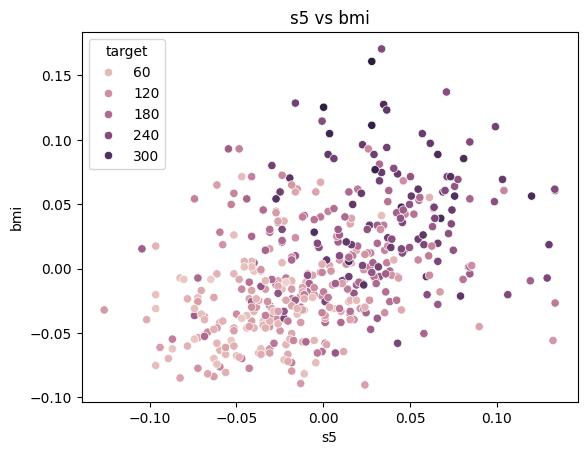

In [ ]:
plt.title('s5 vs bmi')
sns.scatterplot(data=df, x='s5', y='bmi', hue='target')
plt.show()

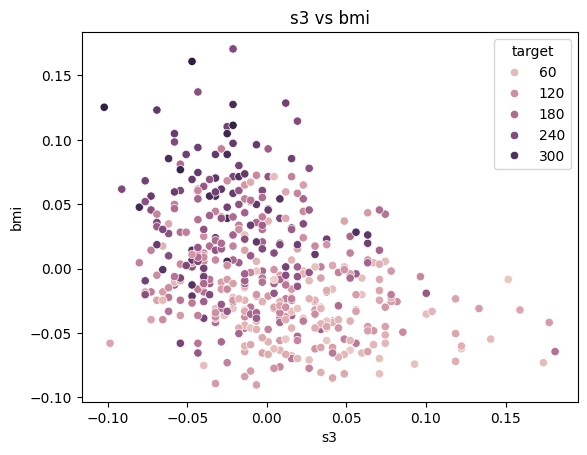

In [ ]:
plt.title('s3 vs bmi')
sns.scatterplot(data=df, x='s3', y='bmi', hue='target')
plt.show()

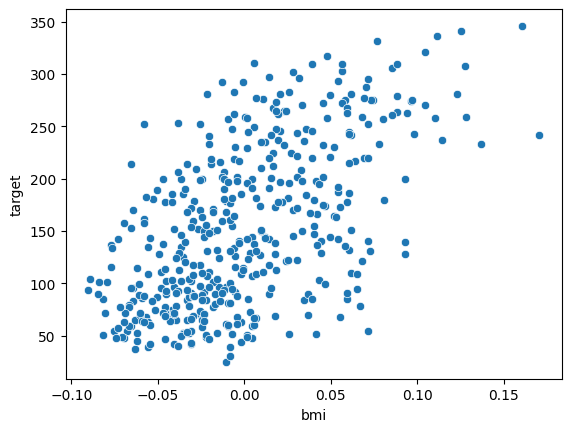

In [ ]:
sns.scatterplot(data=df, x='bmi', y='target')
plt.show()

**Conclusão**

    Buscar um modelo não linear pode ser uma opção melhor para
    modelar esse problema do que um modelo linear.

# Arvore de Decisão para Regressão

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
X = df.drop('target',axis=1)
y = df.target

In [ ]:
# Splitando os dados:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=3)

In [ ]:
# Instanciando o modelo:
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.1,
                           random_state=3)

min_samples_leaf

    impõe a condição de parada na qual
    cada folha deve conter pelo menos
    10% dos dados de treinamento.

In [ ]:
# ajustando o modelo:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [ ]:
dt.score(X_test,y_test)

0.43087292389392984

In [ ]:
# Predição:
y_pred_dt = dt.predict(X_test)

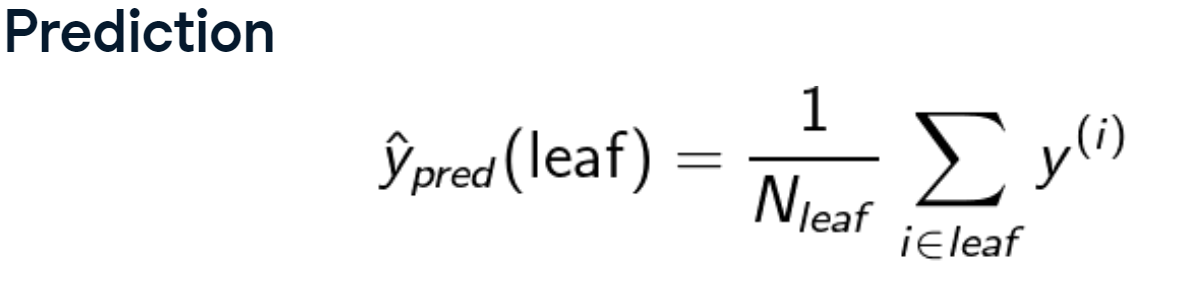

    À medida que uma nova instância atravessa a árvore
    e atinge uma determinada folha, sua variável alvo
    'y' é calculada como a média das variáveis ​​alvo
    contidas naquela folha, conforme mostrado nesta
    fórmula.

In [ ]:
# Métricas:
rmse_dt = (MSE(y_test,y_pred_dt))**.5;rmse_dt

55.512621799818966

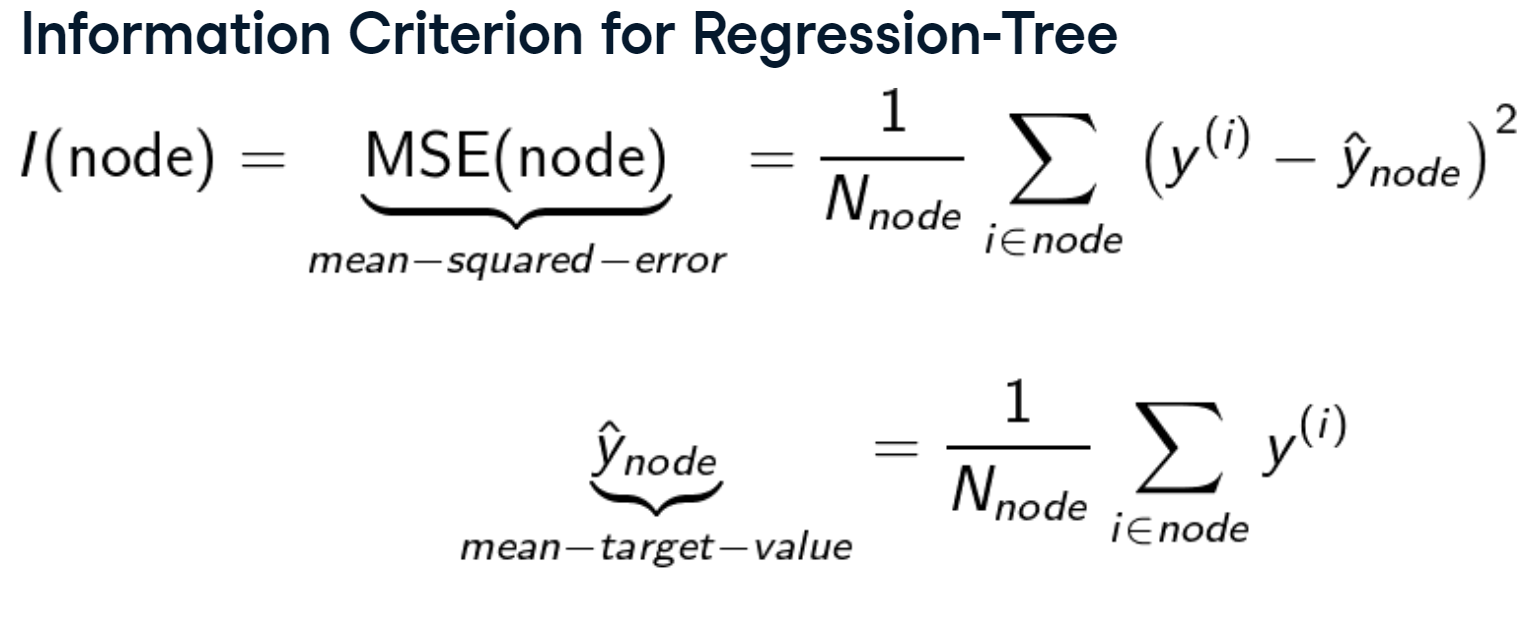

    Aqui, é importante observar que, quando uma árvore de
    regressão é treinada em um conjunto de dados, a impureza
    de um nó é medida usando o erro quadrático médio dos alvos
    nesse nó. Isso significa que a árvore de regressão tenta
    encontrar as divisões que produzem folhas onde em cada folha
    os valores alvo estão em média, o mais próximo possível do
    valor médio dos rótulos naquela folha específica.

# Regressão Linear vs Arvore de Decisão:

    Vamos comparar os dois tipos de modelo para o
    caso em questão e ver qual se sai melhor.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Instanciando o modelo:
linreg = LinearRegression()

# ajustando o modelo:
linreg.fit(X_train,y_train)

# Predição:
y_pred_linreg = linreg.predict(X_test)

In [ ]:
# Métricas:
rmse_dt = (MSE(y_test,y_pred_linreg))**.5;rmse_dt

56.22466665405785

In [ ]:
linreg.score(X_test,y_test)

0.4161792211496945

**Conclusão**

    A diferença foi bem pouca, porém a arvore de decisões
    foi um pouco melhor. Obviamente não estamos aqui elaborando
    muito os modelos.

    Dado a correlação entre as features, eu esperava algo parecido.